In [15]:
using LightGraphs, MetaGraphs
using Distributions
using Plots
using HCubature

In [3]:
mg = initialize_regular_grid_graph_CT()
get_prop(mg,2,:n_delay)

UndefVarError: UndefVarError: initialize_regular_grid_graph_CT not defined

In [19]:
mg = MetaGraph()
add_vertex!(mg,Dict(:x=>1))
add_vertex!(mg,Dict(:x=>2))
add_edge!(mg,1,2,:weight,1.0)

true

In [170]:
d = Gamma(4,2.5)

Gamma{Float64}(α=4.0, θ=2.5)

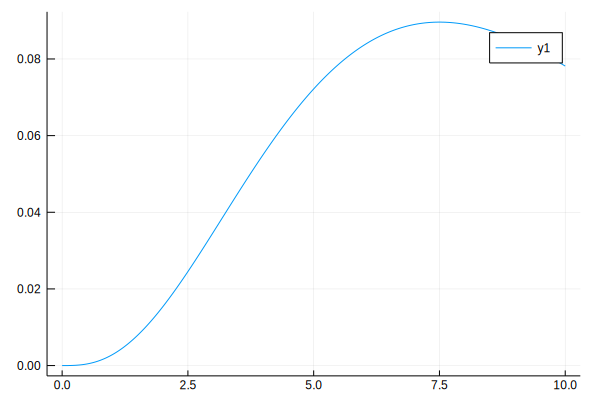

In [171]:
x = range(0,stop=10,length=1000)
y = [pdf(d,f) for f in x]
plot(x,y)

In [20]:
for e in edges(mg)
    print(get_prop(mg,Edge(1,2),:weight))
end

1.0

In [21]:
edges(mg)

SimpleEdgeIter 1

In [23]:
const GraphPath = Vector{Edge}
traversal_time(path::GraphPath) = sum([get_prop(path,e,:weight) for e in path])

traversal_time (generic function with 1 method)

In [28]:
path = GraphPath()
path = Vector([e for e in edges(mg)])

1-element Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}:
 Edge 1 => 2

In [29]:
typeof(path)

Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}

In [30]:
traversal_time(path)

MethodError: MethodError: no method matching traversal_time(::Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1})
Closest candidates are:
  traversal_time(!Matched::Array{LightGraphs.SimpleGraphs.SimpleEdge,1}) at In[23]:2

In [31]:
[get_prop(path,e,:weight) for e in path]

MethodError: MethodError: no method matching get_prop(::Array{LightGraphs.SimpleGraphs.SimpleEdge{Int64},1}, ::LightGraphs.SimpleGraphs.SimpleEdge{Int64}, ::Symbol)
Closest candidates are:
  get_prop(!Matched::AbstractMetaGraph, ::LightGraphs.SimpleGraphs.SimpleEdge, ::Symbol) at /home/peltzer/.julia/packages/MetaGraphs/kAvjf/src/MetaGraphs.jl:237
  get_prop(!Matched::AbstractMetaGraph, !Matched::Integer, ::Symbol) at /home/peltzer/.julia/packages/MetaGraphs/kAvjf/src/MetaGraphs.jl:236

In [3]:
mg = MetaGraph()
for k in range(50)
    add_vertex!(mg,Dict(:x=>k))
end
add_edge!(mg,1,2,:weight,1.0)
add_edge!(mg,5,6,:weight,1.0)

true

In [4]:
for e in edges(mg)
    print(get_prop(mg,Edge(1,2),:weight))
end

1.0

In [5]:
factorial(5)

120

In [6]:
1^3*5

5

In [181]:
function get_collision_probability(n1,t1,n2,t2,nn,t_delay,lambda)

    function d1(z)
        return lambda^nn * z[1]^(nn-1) * exp(-lambda*z[1]) / factorial(nn-1)
    end
        
    function f(x)
        y = x[1]
        t = x[2]
        #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))
        density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * (lambda^(n1) * (t)^(n1-1)  * exp(-lambda*(y+2*t)) / factorial(n1-1))*(lambda^(n2) * (y+t)^(n2-1)/factorial(n2-1))
        return density
    end
    
    a = [0;0]
    b = [1000;1000]
    C,err = hcubature(f,a,b,rtol = 1.0)
    
    return C, err

end

get_collision_probability (generic function with 1 method)

In [31]:
f(x) = sin(x[1]+x[2])
hcubature(f,[0.0;0.0],[1.0;1.0])

(0.773644542789956, 1.0928584898151072e-8)

In [182]:
n1 = 2
t1 = 1
n2 = 3
t2 = 2
nn = 5
t_delay = 0
lambda = 1

1

In [183]:
get_collision_probability(n1,t1,n2,t2,nn,t_delay,lambda)

(0.39206420030442735, 0.10331856234106411)

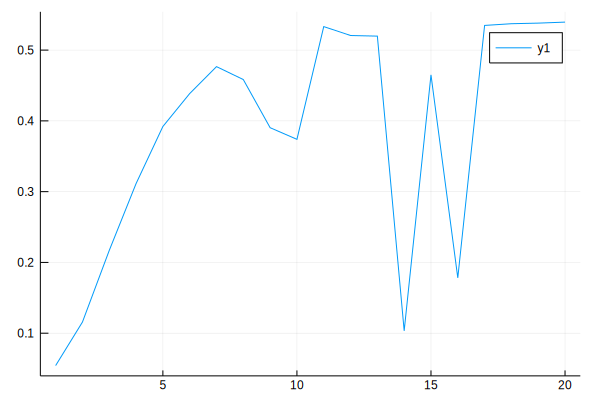

In [184]:
nns = 1:20
cp = [get_collision_probability(n1,t1,n2,t2,nnx,t_delay,lambda)[1] for nnx in nns]
plot(nns,cp)

In [185]:
function d1(z)
    return lambda^nn * z[1]^(nn-1) * exp(-lambda*z[1]) / factorial(nn-1)
end

function f(x)
    y = x[1]
    t = x[2]
    density = hcubature(d1,[t2-t1+y],[10000],rtol = 0.5)[1] * lambda^(n1+n2) *  t^(n1-1) * (t-y)^(n2-1) * exp(-lambda*(y-2*t)) / (factorial(n1-1)*factorial(n2-1))
    return density
end

f (generic function with 1 method)

In [186]:
yx = 15

hcubature(d1,[t2-t1+yx],[100000],rtol = 0.1)[1]

0.0004004376147737622

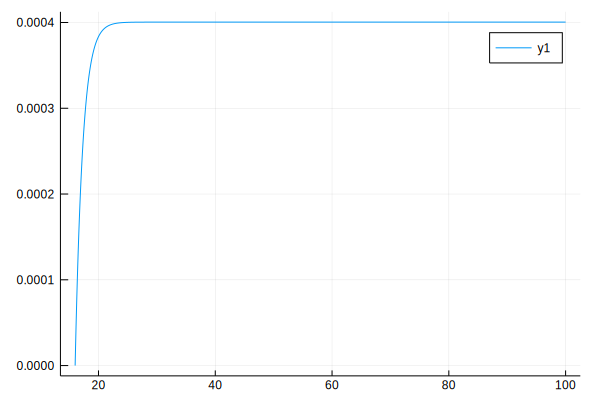

In [187]:
xs = range(16,stop=100,length=10000)
ys = [d1(f) for f in xs]
cdfs = [hcubature(d1,[16],[l],rtol = 0.1)[1] for l in xs]
plot(xs,cdfs)

In [94]:
f([1,-2])

0.015563478430454372

In [89]:
a = [0;0]
b = [100;-100]
hcubature(f,a,b,rtol = 1.0)

(5.002063626513189e43, 2.5765695216192643e43)

In [159]:
1/0.4

2.5

In [180]:
y = 16
t=3

hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))

2.7927342241037763e-11